# Importar librerías

In [136]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.cluster import KMeans, DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Importar datos

In [137]:
df = pd.read_csv('datasets/data_no_outliers.csv')
df.drop('tipo_entidad', axis=1, inplace=True)
df.head()

,renglon,desc_renglon,saldo_a_la_fecha,riesgo_a_c,riesgo_b_c,riesgo_c_c,riesgo_d_c,riesgo_e_c,venc1_6,venc6_12,venc+12
0,0.7868,0.032000,5.666360,0.000000,0.000000,0.000000,0.000000,0.000000,3.397663,2.705182,0.000000
1,0.7868,0.013667,11.989155,6.383507,2.484907,0.000000,1.098612,0.000000,9.572576,5.505385,7.381432
2,0.7868,0.018400,13.999328,6.655440,2.639057,1.098612,0.000000,0.693147,6.453201,0.000000,6.156946
3,0.7868,0.017400,9.829123,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.014014,0.000000
4,0.7868,0.026267,3.522744,0.693147,0.000000,0.000000,0.000000,1.098612,1.142883,2.048017,2.981973


In [138]:
pca = PCA(n_components=0.85).fit(df)

pca.n_components_

3

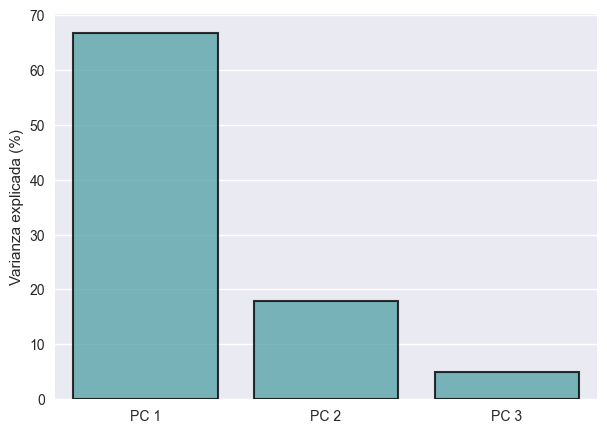

In [139]:
# --- Varianza explicada ---
PCA_variance = pd.DataFrame({'Varianza explicada (%)':
                             pca.explained_variance_ratio_*100})

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

bar = sns.barplot(x = ['PC ' + str(i) for i in range(1, 4)],
                  y = PCA_variance['Varianza explicada (%)'],
                  linewidth = 1.5, edgecolor = 'k', color = '#4bafb8',
                  alpha = 0.8)

plt.show()

In [140]:
PCA_variance

,Varianza explicada (%)
0,66.788125
1,17.939273
2,4.951181


In [141]:
df_pca = pca.fit_transform(df)
df_pca

array([[ 9.73214762,  0.21853818, -3.33283366],
       [-0.67528036, -6.19920047, -0.1259676 ],
       [ 2.14371031, -3.31046761,  4.42768708],
       ...,
       [ 3.2163442 , -4.29865812, -0.3503762 ],
       [ 4.52938047,  1.65551944, -2.2544487 ],
       [ 5.01158497,  0.61671523, -0.61803129]])

# Kmeans

### Datos sin PCA

**Inercia**

In [142]:
# Número optimo de K
inertia_list = []
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=3)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

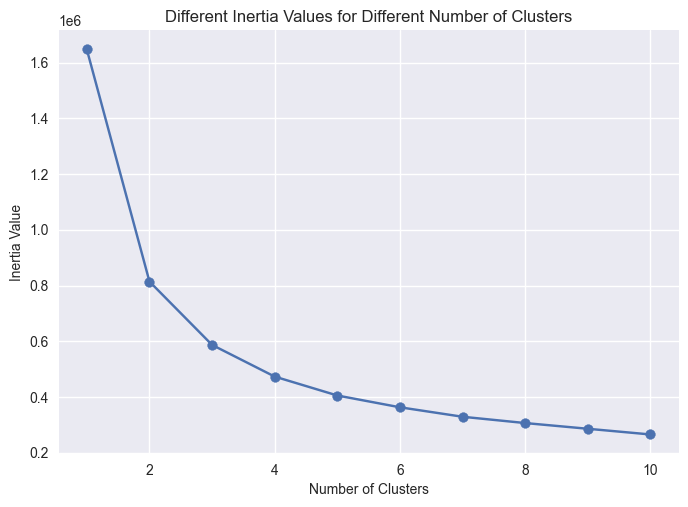

In [143]:
# plot the inertia curve
plt.plot(range(1,11),inertia_list)
plt.scatter(range(1,11),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [144]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 11),
                 inertia_list, curve="convex",
                 direction="decreasing")
kl.elbow

3

**Instanciar modelo**

In [145]:
kmeans_constants = {"init": "k-means++", "n_init": 100, "max_iter": 500, "random_state": 42}

model_kmeans = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans.fit(df)

KMeans(max_iter=500, n_clusters=3, n_init=100, random_state=42)

**Obtener predicciones**

In [146]:
df_final = df.copy()
# Predicción de los clusters
clusters = model_kmeans.fit_predict(df)

df_final['cluster']= clusters

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

,renglon,desc_renglon,saldo_a_la_fecha,riesgo_a_c,riesgo_b_c,riesgo_c_c,riesgo_d_c,riesgo_e_c,venc1_6,venc6_12,venc+12,cluster
0,0.7868,0.032000,5.666360,0.000000,0.000000,0.000000,0.000000,0.000000,3.397663,2.705182,0.000000,0
1,0.7868,0.013667,11.989155,6.383507,2.484907,0.000000,1.098612,0.000000,9.572576,5.505385,7.381432,2
2,0.7868,0.018400,13.999328,6.655440,2.639057,1.098612,0.000000,0.693147,6.453201,0.000000,6.156946,0


**Evaluar modelo**

In [147]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans.inertia_)
print('Silhouette Score: ', silhouette_score(df, model_kmeans.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df, model_kmeans.labels_))

 ### K-MEANS ###
Inertia:  587029.4412386188


Silhouette Score:  0.4239690304126964
Calinski harabasz score:  13545.683325201684


### Datos con PCA

**Inercia**

In [148]:
# Número optimo de K
inertia_list = []
kmeans_kwargs = {"init": "k-means++", "n_init": 10, "max_iter": 300, "random_state": 3}

for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(df_pca)
    inertia_list.append(kmeans.inertia_)

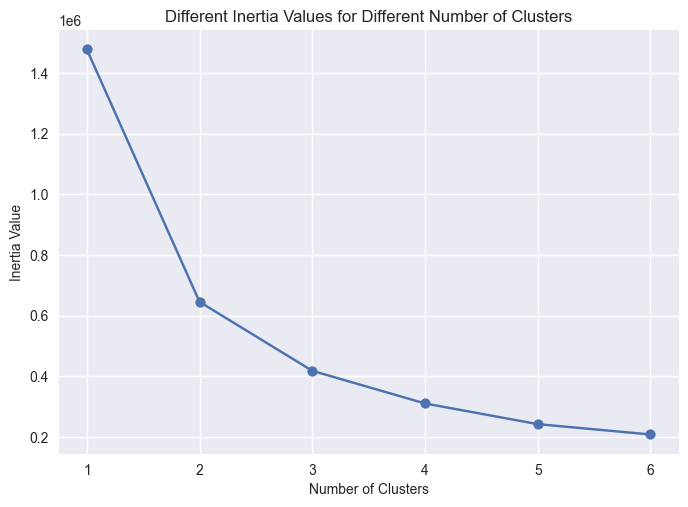

In [149]:
# plot the inertia curve
plt.plot(range(1,7),inertia_list)
plt.scatter(range(1,7),inertia_list)
plt.xlabel("Number of Clusters", size=10)
plt.ylabel("Inertia Value", size=10)
plt.title("Different Inertia Values for Different Number of Clusters", size=12)
plt.show()

In [150]:
# Seleccion automatica del numero k
kl = KneeLocator(range(1, 7),
                 inertia_list, curve="convex",
                 direction="decreasing")
kl.elbow

2

**Intanciar modelo Kmeans**

In [151]:
kmeans_constants = {"init": "k-means++", "n_init": 100, "max_iter": 500, "random_state": 42}

model_kmeans_pca = KMeans(n_clusters = 3, **kmeans_constants)
model_kmeans_pca.fit(df_pca)

KMeans(max_iter=500, n_clusters=3, n_init=100, random_state=42)

**Obtener predicciones**

In [152]:
df_final_pca = df.copy()

# Predicción de los clusters
clusters_pca = model_kmeans_pca.fit_predict(df_pca)

df_final_pca['cluster']= clusters_pca

# A partir de ahora, sólo trabajaremos con "df_final"
df_final_pca.head(3)

,renglon,desc_renglon,saldo_a_la_fecha,riesgo_a_c,riesgo_b_c,riesgo_c_c,riesgo_d_c,riesgo_e_c,venc1_6,venc6_12,venc+12,cluster
0,0.7868,0.032000,5.666360,0.000000,0.000000,0.000000,0.000000,0.000000,3.397663,2.705182,0.000000,1
1,0.7868,0.013667,11.989155,6.383507,2.484907,0.000000,1.098612,0.000000,9.572576,5.505385,7.381432,2
2,0.7868,0.018400,13.999328,6.655440,2.639057,1.098612,0.000000,0.693147,6.453201,0.000000,6.156946,1


**Evaluar modelo**

In [153]:
# --- Evaluación del modelo kmeans ---
print(" ### K-MEANS ###")
print('Inertia: ', model_kmeans_pca.inertia_)
print('Silhouette Score: ', silhouette_score(df_pca, model_kmeans_pca.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df_pca, model_kmeans_pca.labels_))

 ### K-MEANS ###
Inertia:  418031.9255083163


Silhouette Score:  0.5008854993687823
Calinski harabasz score:  19003.037982771206


**Graficar cluster**

In [154]:
import plotly.graph_objects as go
import pandas as pd
# Crear tres DataFrames de ejemplo para los subplots

data1 = {'PCA1': df_pca[clusters_pca == 0,0], 'PCA2': df_pca[clusters_pca == 0,1], 'PCA3': df_pca[clusters_pca == 0,2]}
data2 = {'PCA1': df_pca[clusters_pca == 1,0], 'PCA2': df_pca[clusters_pca == 1,1], 'PCA3': df_pca[clusters_pca == 1,2]}
data3 = {'PCA1': df_pca[clusters_pca == 2,0], 'PCA2': df_pca[clusters_pca == 2,1], 'PCA3': df_pca[clusters_pca == 2,2]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Crear tres subplots scatter 3D
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=df1['PCA1'], y=df1['PCA2'], z=df1['PCA3'], mode='markers', name='Cluster 0', marker=dict(size=5, color='#f07877', line=dict(width=2, color='#d05655'))))
fig.add_trace(go.Scatter3d(x=df2['PCA1'], y=df2['PCA2'], z=df2['PCA3'], mode='markers', name='Cluster 1', marker=dict(size=5, color='#f7a472', line=dict(width=2, color='#d57250'))))
fig.add_trace(go.Scatter3d(x=df3['PCA1'], y=df3['PCA2'], z=df3['PCA3'], mode='markers', name='Cluster 2', marker=dict(size=5, color='#c0d88c', line=dict(width=2, color='#a0b66a'))))

# Personalizar el diseño del gráfico
fig.update_layout(scene=dict(aspectmode='cube'))

# Mostrar el gráfico
fig.show()

## DBSCAN

### Datos sin PCA

In [155]:
from sklearn.neighbors import NearestNeighbors

# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(df)

distances, *other = neighbors.kneighbors(df)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)
distances

(15000,)


array([0.        , 0.        , 0.        , ..., 6.44248944, 7.64509825,
       7.83356865])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3984\1471989755.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



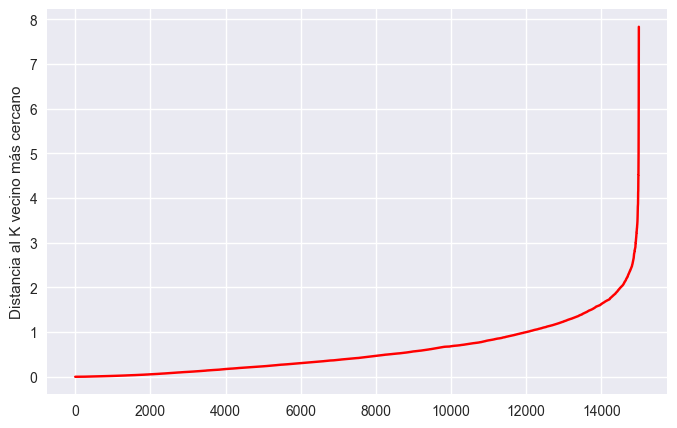

In [156]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(distances, color = 'red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()

In [157]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

14988

In [158]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]
epsilon

4.515326605802971

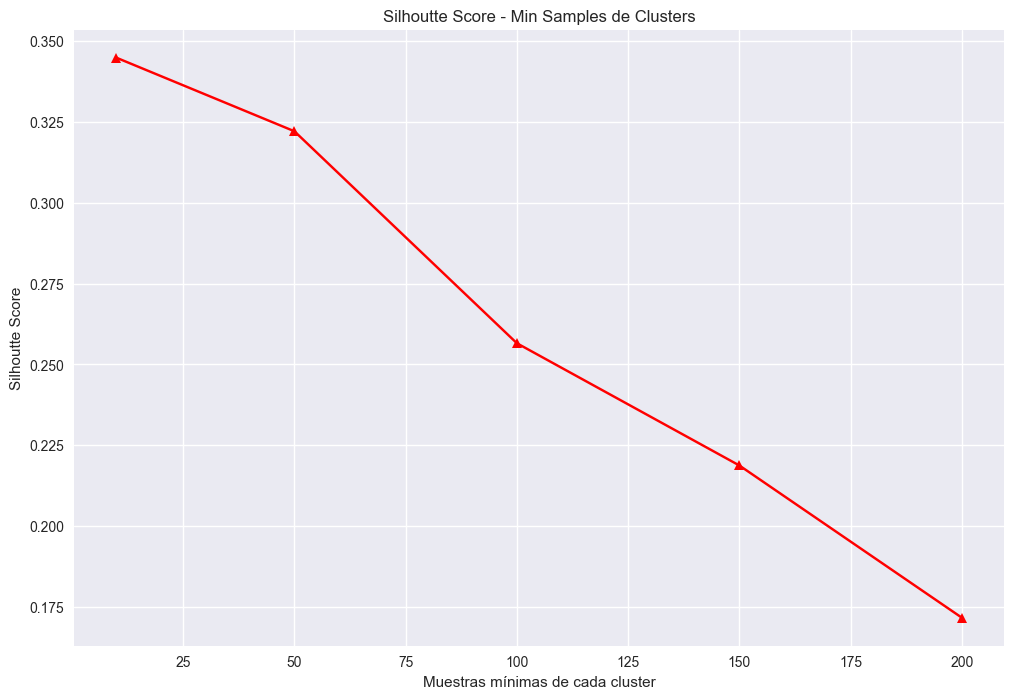

In [159]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [10,50,100,150,200]:
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)
    model_d.fit(df)
    silhoutte_coefs.append(silhouette_score(df, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([10,50,100,150,200], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

In [160]:
# --- Modelo DBSCAN ---
model_db = DBSCAN(eps = epsilon, min_samples = 10, n_jobs=-1)
model_db.fit(df)

DBSCAN(eps=4.515326605802971, min_samples=10, n_jobs=-1)

In [161]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(df, model_db.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df, model_db.labels_))

 ### DBSCAN ###


Silhouette Score:  0.34484314087428913
Calinski harabasz score:  126.41893834126613


In [162]:
Cluster_2 = model_db.fit_predict(df)

df_final['Cluster_2']= Cluster_2

# A partir de ahora, sólo trabajaremos con "df_final"
df_final.head(3)

,renglon,desc_renglon,saldo_a_la_fecha,riesgo_a_c,riesgo_b_c,riesgo_c_c,riesgo_d_c,riesgo_e_c,venc1_6,venc6_12,venc+12,cluster,Cluster_2
0,0.7868,0.032000,5.666360,0.000000,0.000000,0.000000,0.000000,0.000000,3.397663,2.705182,0.000000,0,0
1,0.7868,0.013667,11.989155,6.383507,2.484907,0.000000,1.098612,0.000000,9.572576,5.505385,7.381432,2,0
2,0.7868,0.018400,13.999328,6.655440,2.639057,1.098612,0.000000,0.693147,6.453201,0.000000,6.156946,0,0


In [163]:
df_final['Cluster_2'].value_counts()

Cluster_2
 0    14917
-1       83
Name: count, dtype: int64

### Datos con PCA

In [164]:

# --- Selección de hiperparámetros eps ---

# --- Gráfica de distancias K --
neighbors = NearestNeighbors(n_neighbors = 2)
neighbors.fit(df_pca)

distances, *other = neighbors.kneighbors(df_pca)
distances = distances[:, 1]
print(distances.shape)
distances = np.sort(distances, axis = 0)
distances

(15000,)


array([0.        , 0.        , 0.        , ..., 2.79859215, 4.16142711,
       5.96139957])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3984\1471989755.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



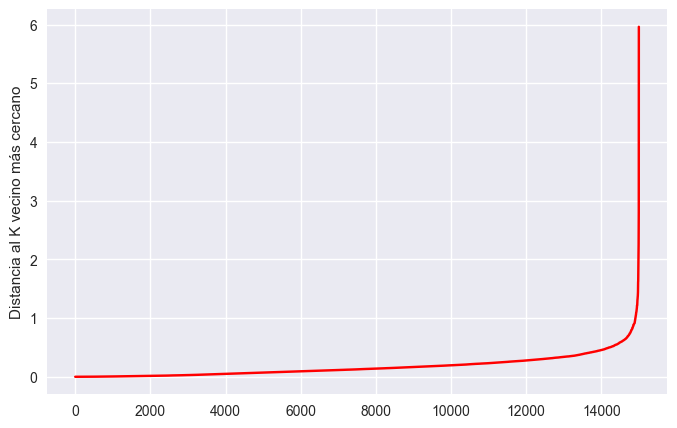

In [165]:
plt.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.plot(distances, color = 'red')
plt.ylabel('Distancia al K vecino más cercano')
plt.show()

In [166]:
# --- Selección del punto de curvatura máxima ---
kl = KneeLocator(range(len(distances)), distances, curve = 'convex', direction = 'increasing')
kl.elbow

14906

In [167]:
# --- Epsilon óptimo --
epsilon = distances[kl.elbow]
epsilon

0.9901000983602106

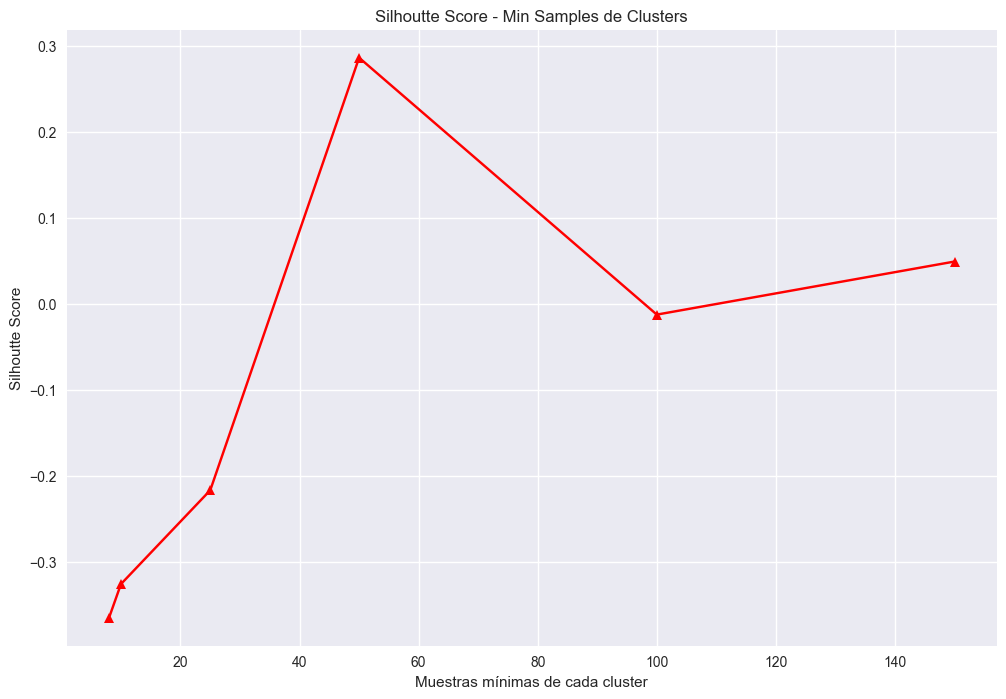

In [168]:
# --- Selección de hiperparámetros min_sample ---
silhoutte_coefs = []

for min_points in [8, 10, 25,50,100,150]:
    model_d = DBSCAN(eps = epsilon, min_samples = min_points)
    model_d.fit(df_pca)
    silhoutte_coefs.append(silhouette_score(df_pca, model_d.labels_))

plt.figure(figsize = (12, 8))
plt.plot([8, 10, 25,50,100,150], silhoutte_coefs, color = 'r', marker = '^')
plt.xlabel('Muestras mínimas de cada cluster')
plt.ylabel('Silhoutte Score')
plt.title('Silhoutte Score - Min Samples de Clusters')
plt.show()

In [169]:
# --- Modelo DBSCAN ---
model_db = DBSCAN(eps = 5, min_samples = 50, n_jobs=-1)
model_db.fit(df_pca)

DBSCAN(eps=5, min_samples=50, n_jobs=-1)

In [170]:
# --- Evaluación del modelo DBSCAN ---
print(" ### DBSCAN ###")
print('Silhouette Score: ', silhouette_score(df_pca, model_db.labels_))
print('Calinski harabasz score: ', calinski_harabasz_score(df_pca, model_db.labels_))

 ### DBSCAN ###


Silhouette Score:  0.4257596439774187
Calinski harabasz score:  106.06761336287623


In [171]:
Cluster_2_pca = model_db.fit_predict(df_final_pca)

df_final_pca['Cluster_2']= Cluster_2_pca

# A partir de ahora, sólo trabajaremos con "df_final"
df_final_pca.head(3)

,renglon,desc_renglon,saldo_a_la_fecha,riesgo_a_c,riesgo_b_c,riesgo_c_c,riesgo_d_c,riesgo_e_c,venc1_6,venc6_12,venc+12,cluster,Cluster_2
0,0.7868,0.032000,5.666360,0.000000,0.000000,0.000000,0.000000,0.000000,3.397663,2.705182,0.000000,1,0
1,0.7868,0.013667,11.989155,6.383507,2.484907,0.000000,1.098612,0.000000,9.572576,5.505385,7.381432,2,0
2,0.7868,0.018400,13.999328,6.655440,2.639057,1.098612,0.000000,0.693147,6.453201,0.000000,6.156946,1,0


In [172]:
df_final_pca['Cluster_2'].value_counts()

Cluster_2
 0    14920
-1       80
Name: count, dtype: int64

In [173]:
# Crear tres DataFrames de ejemplo para los subplots

data1 = {'PCA1': df_pca[Cluster_2_pca == 0,0], 'PCA2': df_pca[Cluster_2_pca == 0,1], 'PCA3': df_pca[Cluster_2_pca == 0,2]}
data2 = {'PCA1': df_pca[Cluster_2_pca == 1,0], 'PCA2': df_pca[Cluster_2_pca == 1,1], 'PCA3': df_pca[Cluster_2_pca == 1,2]}
data3 = {'PCA1': df_pca[Cluster_2_pca == -1,0], 'PCA2': df_pca[Cluster_2_pca == -1,1], 'PCA3': df_pca[Cluster_2_pca == -1,2]}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)

# Crear tres subplots scatter 3D
fig = go.Figure()

fig.add_trace(go.Scatter3d(x=df1['PCA1'], y=df1['PCA2'], z=df1['PCA3'], mode='markers', name='Cluster 0', marker=dict(size=5, color='#f07877', line=dict(width=2, color='#d05655'))))
fig.add_trace(go.Scatter3d(x=df2['PCA1'], y=df2['PCA2'], z=df2['PCA3'], mode='markers', name='Cluster 1', marker=dict(size=5, color='#f7a472', line=dict(width=2, color='#d57250'))))
fig.add_trace(go.Scatter3d(x=df3['PCA1'], y=df3['PCA2'], z=df3['PCA3'], mode='markers', name='Ruido', marker=dict(size=5, color='#c0d88c', line=dict(width=2, color='#a0b66a'))))

# Personalizar el diseño del gráfico
fig.update_layout(scene=dict(aspectmode='cube'))

# Mostrar el gráfico
fig.show()